In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cost function

$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})^2} + \lambda \sum_{j=1}^{n}{\theta_j^2} \right)$<br>
where $h_{\theta}(x) = \theta^T x$ is the hypothesis function

In [0]:
def cost_function(X,y,theta,lmbda):
  """
  cost_function is a function used to compute the least-squared error of the hypothesis function
  
  Parameters:
    X - np.array : the input data - #observations by #features
    y - np.array : the output targets
    theta - np.array : the parameters
  
  Returns:
    the cost of hypothesis function
  """
  m = X.shape[0]
  h_theta = X.dot(theta)
  return (0.5/m) * (sum((h_theta-y)**2) + lmbda * sum(theta**2))

# Gradient Descent
$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}}$

In [0]:
def grad_cost_function(X, y, theta):
  """
  grad_cost_function is a function used to compute gradient of cost function
  Parameters:
    X - np.array : the input data - #observations by #features
    y - np.array : the output targets
    theta - np.array : the parameters
  
  Returns:
    the gradient of the cost of hypothesis function
  """
  n_obsevations = X.shape[0]
  h_theta = X.dot(theta)
  
  return (h_theta-y).dot(X) / n_obsevations

In [0]:
def initialize_theta(n):
  # Initialize theta
  return np.random.normal(0,1,n)

In [0]:
def add_bias_unit(X):
  # Add a column of one's to the matrix X
  return np.append(np.ones((len(X),1)),X,axis=1)

In [0]:
def fit(X, y, learning_rate=0.1, lmbda=1e-4, max_ite=100, learning_rate_adapted=True):
  """
  fit is a function used for training data
  Parameters:
    X - np.array : the input data - #observations by #features
    y - np.array : the output targets
    learning_rate - float : the learning rate alpha - default 0.1
    lmbda - float : coefficient of regularization - default 1e-4
    max_ite - int : number of iterations of loop
    
  Returns:
    List of cost during the training process
    List of theta during the training process
    Model - the parameter theta
  """
  if X.ndim == 1:
    X.resize(len(X),1)
  X = add_bias_unit(X) # add bias unit
  
  n_observations, n_features = X.shape
  
  theta_L = []
  theta = initialize_theta(n_features)
  theta_L.append(theta)
  
  cost_L = []
  J = cost_function(X,y,theta,lmbda)
  cost_L.append(J)
  
  for i in range(max_ite):
    grad_theta = grad_cost_function(X,y,theta)
    # Update theta
    if learning_rate_adapted:
      learning_rate = (1-i/max_ite)*learning_rate
    theta = theta - learning_rate * grad_theta
    theta_L.append(theta)
    
    # Compute cost function
    J = cost_function(X,y,theta,lmbda)
    cost_L.append(J)
  
  model = theta_L[-1]
  return cost_L, theta_L, model

# Run an example
Now, I generate a training data including 100 samples to test my algorithm.<br>
$Y = -3 + 4X + \epsilon$<br>
where $\epsilon$ is error with normal distribution $\mathcal{N}(0,1)$


In [0]:
n_samples = 100
X = np.random.uniform(-6,6,n_samples)
epsilon = np.random.normal(0,1,n_samples)
a = -3
b = 4
y = a + b*X + epsilon

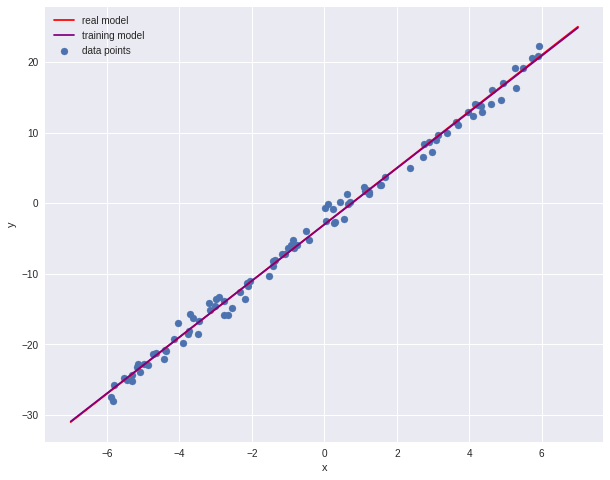

In [8]:
x = np.linspace(-7,7,10)

cost_L, theta_L, model = fit(X,y,0.1,1e-4,75, learning_rate_adapted=False)

# plot data
plt.figure(figsize=(10,8))
plt.scatter(X,y,marker='o')
plt.plot(x,a+b*x,c='red')
plt.plot(x,model[0] + x*model[1], c='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['real model','training model','data points'])
plt.show()

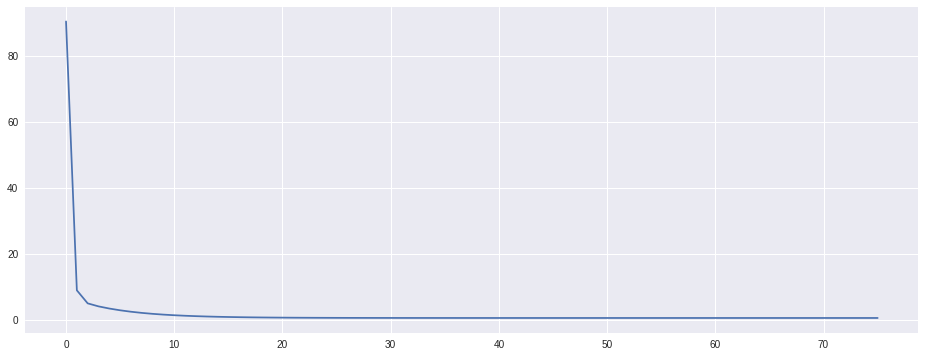

array([-3.03229092,  3.98380834])

In [13]:
# plot cost function
plt.figure(figsize=(16,6))
plt.plot(cost_L)
plt.show()
model

# Run on a dataset
I would use the Boston house prices dataset in Sci-kit learn.

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      